# Testing a Perceptual Phenomenon

## Table of Contents
><ul>   
><li><a href="#intro">Introduction</a></li>
><li><a href="#desc">Descriptive Statistics</a></li>
><li><a href="#vis">Visualizations</a></li>
><li><a href="#res">Results</a></li>
><li><a href="#sumres">Summary of Results</a></li>
><li><a href="#ref">References</a></li>
></ul>

<a id='intro'></a>
# Introduction
> 1. What is our independent variable? What is our dependent variable?
>> - The independent variables are congruency and incongruency
>> - The depenedent variable is time
>
>2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.
>> - An appropriate null hypothesis is that the congruency will not affect the time needed to complete the test
>>
>>   H0: μ0 = μ1 
>>
>>
>> - The alternative hypothesis is that congruency will affect the time needed to complete the test
>>
>>   H1: μ0 $\neq$ μ1
>>
>>   μ0 : congruent mean      
>>   μ1 : incongruent mean
>>
>>
>> - I will be using a dependent sample t-test to determine if there is a statistical difference in time needed for the two word groups. I  chose the dependant sample t-test because it can help to determine if there is statisticaly significant difference between the two means  

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [3]:
raw_df = pd.read_csv('stroopdata.csv')
raw_df.shape #check df

(24, 2)

In [4]:
raw_df.dtypes #check data types

Congruent      float64
Incongruent    float64
dtype: object

In [5]:
raw_df.head() # take a quick look at the data

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


<a id='desc'></a>
# Desciptive Statistics
> 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.
>>
>> I used the Pandas describe method for summary statistics including:
>> - Mean, for central tendency
>> - Standard deviation and interquartile range, for variability 

In [6]:
raw_df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


<a id='vis'></a>
# Visualizations
> 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.
>>
>><a href="#fig1">Figure 1</a> plots the distribution of congruent data with an overlay of incongruent data. Both data groups appear to have normal distribution, however the values of the incongruent data are notably higher.
>>
>><a href="#fig2">Figure 2</a> more clearly demonstrates the higher times for the incongruent data and highlights the presence of two outliers for the incongruent data
>>
>><a href="#fig3">Figure 3</a> demonstrates that the summary statistics for the incongruent data are notably higher than the congruent data

### Figure 1
<a id='fig1'></a>

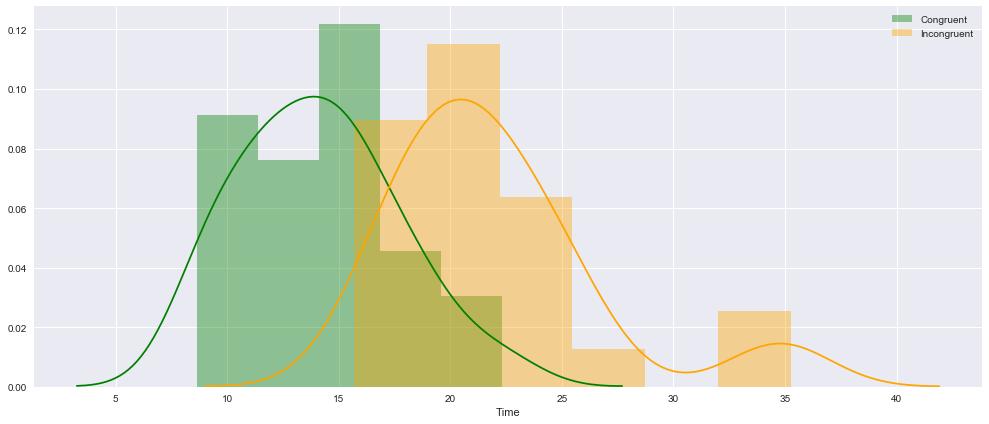

In [7]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(17,7))

sns.distplot(raw_df['Congruent'], color = 'Green')
sns.distplot(raw_df['Incongruent'], color = 'Orange', axlabel = 'Time')
plt.legend(loc='upper right', labels=['Congruent', 'Incongruent'])

### Figure 2
<a id='fig2'></a>

In [8]:
bd = raw_df.copy()

In [9]:
bd2 = pd.melt( bd, value_vars=['Congruent', 'Incongruent'])

[Text(0, 0.5, ''), Text(0.5, 0, 'time')]

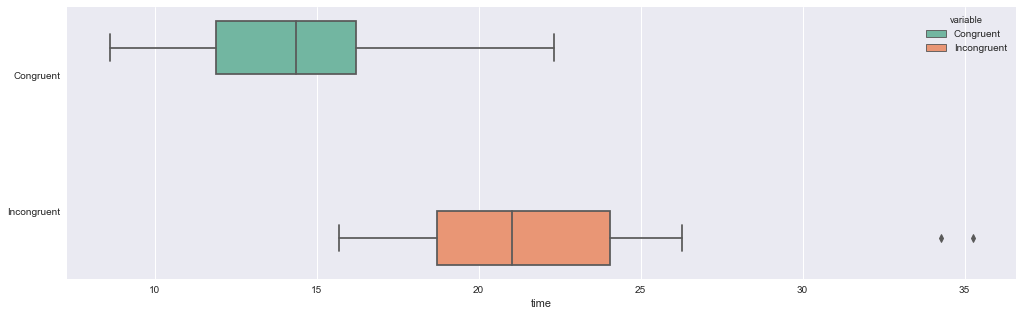

In [10]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(17,5))
ax1 = sns.boxplot( y = 'variable', x = 'value', hue = 'variable',  data= bd2, ax = ax1, palette='Set2', orient='h')
ax1.set(xlabel='time', ylabel='')

### FIgure 3
<a id='fig3'></a>

In [11]:
rd =  raw_df.describe()

In [12]:
rd.reset_index(inplace = True)
nd = pd.melt( rd, id_vars=['index'], value_vars=['Congruent', 'Incongruent'])

[Text(0, 0.5, 'value'), Text(0.5, 0, 'statistic')]

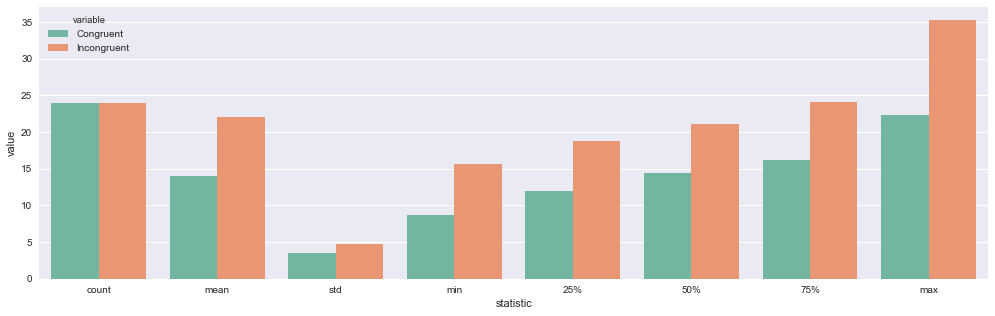

In [13]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(17,5))
ax2 = sns.barplot( x = 'index', y = 'value', hue = 'variable',  data= nd, ax = ax1, palette ='Set2')
ax2.set(xlabel='statistic', ylabel='value')

<a id='res'></a>
# Results

In [14]:
#Calculations for results
from scipy.stats import ttest_rel as tt
from scipy.stats import t

conLev = 0.99
thresh = round(1- conLev, 2)

dof = len(raw_df)-1 #calculate degrees of freedom
tStat, pValue = tt(raw_df['Congruent'], raw_df['Incongruent']) #calculate t-stat and p-value
crit = t.ppf(0.995, dof) #calculate critical value. confidence level of 0.995 is for one sided which equals 0.99 two sided

ts = round(abs(tStat), 4)
pv = round(pValue, 10)
cv = round(crit, 4)


print( 't-statistic = {} \np-value = {} \nDegrees of Freedom = {} \nCritical Value = {}'
      .format(ts, pv, dof, cv))
print('\n{} > {}   t-stat is greater than critical value'.format(ts, cv))
print('\n{} < {}    p-value is less than the threshhold'.format(pv,  thresh))

t-statistic = 8.0207 
p-value = 4.1e-08 
Degrees of Freedom = 23 
Critical Value = 2.8073

8.0207 > 2.8073   t-stat is greater than critical value

4.1e-08 < 0.01    p-value is less than the threshhold


<a id='sumres'></a>
# Summary of Results
>5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?
>>
>> - The confidence level used for this test was 0.99 and the critical value was 2.8073
>>- I reject the null hypothesis. The t-statistic was greater than the critical value and the p-value was less than the threshold of 0.01
>>
>> - The results were in line with my expectations due to my own experience with the Stroop effect. The incongruent samples required a split second of thinking that the congruent samples did not.
>>

<a id='ref'></a>
# References
>https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html
>https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f.html